<center><h2>Analysis of News 24</h2></center>

**News24** is owned by Media24, South Africa's leading media company, with interests in digital media and services, newspapers, magazines, e-commerce, book publishing, print and distribution. 

**Purpose of the project:** find out how many articles are dedicated to the war in Ukraine.

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('news_24_dataset.json')
df

,title,date,url
0,"Will political pacts save SA? Steenhuisen, Mas...",2023-04-13,https://www.news24.com/news24/opinions/reader_...
1,Who will govern SA after 2024? Sign up for our...,2023-02-07,https://www.news24.com/news24/opinions/reader_...
2,WRAP | Public Protector impeachment resumes af...,2023-05-15,https://www.news24.com/news24/southafrica/news...
3,Do you have any complaints or feedback about N...,2020-04-08,https://www.news24.com/news24/southafrica/news...
4,Russian embassy hits back at US ambassador's c...,2023-05-16,https://www.news24.com/news24/politics/governm...
...,...,...,...
1101,Electoral Amendment Bill: Civil society slams ...,2022-06-01,https://www.news24.com/news24/politics/elector...
1102,Xolile George appointed as Secretary to Parlia...,2022-06-01,https://www.news24.com/news24/politics/xolile-...
1103,DA objects to ANC's nod to Glen Mashinini for ...,2022-06-01,https://www.news24.com/news24/politics/da-obje...
1104,"SAPS spends R1.5bn on overtime for officers, u...",2022-06-01,https://www.news24.com/news24/politics/saps-sp...


In [3]:
anchors = [
    "ukraine",
    "ukrainian",
    "russia",
    "russian",
    "dpr",
    "lpr",
    "putin",
    "zelensky"
]

In [4]:
def check(string: str):
    for word in anchors:
        if word in string.lower():
            return True
    return False

war_df = df[df['title'].apply(lambda x: check(x))]
war_df.head()

,title,date,url
4,Russian embassy hits back at US ambassador's c...,2023-05-16,https://www.news24.com/news24/politics/governm...
7,"#LadyRussiagate | Putin, Zelensky accept Afric...",2023-05-16,https://www.news24.com/news24/politics/parliam...
8,#LadyRussiagate | US ambassador 'totally misre...,2023-05-16,https://www.news24.com/news24/politics/governm...
19,'Non-aligned' nonchalance: SA won't be forced ...,2023-05-15,https://www.news24.com/news24/politics/governm...
25,"#LadyRussiagate: Ramaphosa, Zelensky hold talk...",2023-05-14,https://www.news24.com/fin24/economy/ladyrussi...


## Jun - Dec 2022

In [5]:
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
def get_month(date: datetime):
    return date.month

df_2022 = df[df['date'] < datetime(2023, 1, 1)][1:]
df_2022['month'] = df_2022['date'].apply(lambda x: get_month(x))

war_df_2022 = war_df[war_df['date'] < datetime(2023, 1, 1)]
war_df_2022['month'] = war_df_2022['date'].apply(lambda x: get_month(x))
war_df_2022.head()

/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_97625/3011669276.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war_df_2022['month'] = war_df_2022['date'].apply(lambda x: get_month(x))


,title,date,url,month
744,US trip: Ramaphosa to reaffirm SA’s non-aligne...,2022-09-12,https://www.news24.com/news24/politics/us-trip...,9
760,"SA won't be bullied, Pandor tells Blinken on U...",2022-08-09,https://www.news24.com/news24/politics/sa-wont...,8
838,Wheat shortages caused by Ukraine/Russia war a...,2022-07-23,https://www.news24.com/news24/politics/wheat-s...,7
868,Russia-Ukraine war: Govt faces heat over neutr...,2022-07-18,https://www.news24.com/news24/politics/russia-...,7
969,Russia-Ukraine conflict could force African co...,2022-06-28,https://www.news24.com/news24/politics/russia-...,6


In [7]:
war_perc_2022 = []
months = list(range(6, 13))
for month in months:
    month_df = df_2022[df_2022['month'] == month].shape[0]
    month_war_df = war_df_2022[war_df_2022['month'] == month].shape[0]
    try:
        war_perc_2022.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2022.append(0.0)

### Building plot 2022

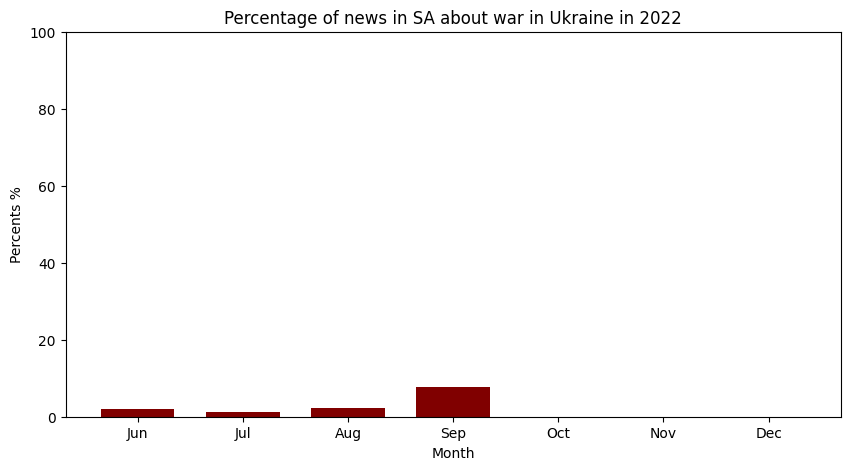

In [8]:
months = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(months, war_perc_2022, color ='maroon', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in SA about war in Ukraine in 2022")
plt.show()

## Jan - May 2023

In [9]:
df_2023 = df[df['date'] >= datetime(2023, 1, 1)]
df_2023['month'] = df_2023['date'].apply(lambda x: get_month(x))

war_df_2023 = war_df[war_df['date'] >= datetime(2023, 1, 1)]
war_df_2023['month'] = war_df_2023['date'].apply(lambda x: get_month(x))
war_df_2023.head()

/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_97625/3617843910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['month'] = df_2023['date'].apply(lambda x: get_month(x))
/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_97625/3617843910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war_df_2023['month'] = war_df_2023['date'].apply(lambda x: get_month(x))


,title,date,url,month
4,Russian embassy hits back at US ambassador's c...,2023-05-16,https://www.news24.com/news24/politics/governm...,5
7,"#LadyRussiagate | Putin, Zelensky accept Afric...",2023-05-16,https://www.news24.com/news24/politics/parliam...,5
8,#LadyRussiagate | US ambassador 'totally misre...,2023-05-16,https://www.news24.com/news24/politics/governm...,5
19,'Non-aligned' nonchalance: SA won't be forced ...,2023-05-15,https://www.news24.com/news24/politics/governm...,5
25,"#LadyRussiagate: Ramaphosa, Zelensky hold talk...",2023-05-14,https://www.news24.com/fin24/economy/ladyrussi...,5


In [10]:
war_perc_2023 = []
months = list(range(1, 6))
for month in months:
    month_df = df_2023[df_2023['month'] == month].shape[0]
    month_war_df = war_df_2023[war_df_2023['month'] == month].shape[0]
    try:
        war_perc_2023.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2023.append(0.0)

### Building plot 2023

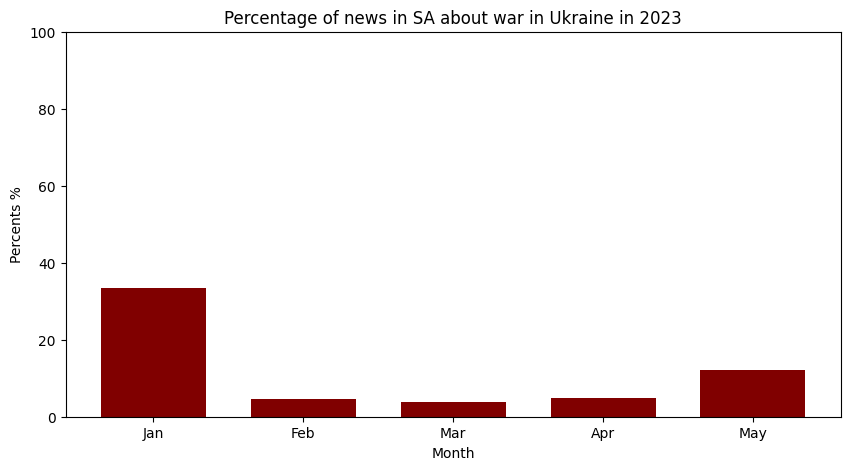

In [11]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(months, war_perc_2023, color ='maroon', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in SA about war in Ukraine in 2023")
plt.show()